# 5 ВАРИАНТ

## Текст задания

Реализовать разбор двоичного формата данных (в духе формата WAD игры Doom
или графического формата PNG). Данные начинаются с сигнатуры 0x47 0x45 0x4c 0xec, за которой
следует структура A. Порядок байт: от младшего к старшему. Адреса указаны в виде смещений
от начала данных. В решении разрешено использовать модуль struct.

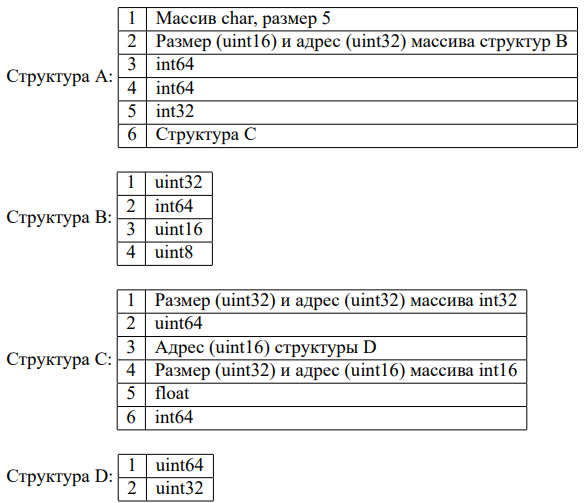

## Примеры разбора двоичного формата

In [ ]:
1.  Двоичные данные:
    
   (b'GEL\xecoziqk\x03\x00G\x00\x00\x00\xd7}\x17\x04c\x01\xca\xc0\xce\xbfv\x8b@'
    b'Y\xc8w\xff\x83\x16\xf9\x02\x00\x00\x00t\x00\x00\x00\x12\x99\xc8\r\x1d'
    b'\x87<\xda|\x00\x02\x00\x00\x00\x88\x00\xe4\x96\x17\xbf\xd5\xd2|\x80h'
    b"\x05\xd3\x14_\x05\x8f\x0f\x01\xa1\x02{\x16\x02'\xefG\xce\x98\x87\xfa"
    b'[\xa1U\x91>\xb8\xba"\xd6\x07\xd4\xc9\x15p\xac\xf22(\xb1\xfaj\xc7S\x8f'
    b'\xd6\x0b\xb3p\xb6\xfb\xc2\xa4\x1b\xdexN\xe5\x94=\xfa\xd9y\x10M\xb9t^\x13'
    b'\xf8\xf8\x1a\x98')

    Результат разбора:
        
   {'A1': 'oziqk',
    'A2': [{'B1': 261031263, 'B2': -1213999278976753407, 'B3': 52807, 'B4': 152},
           {'B1': 2707159687, 'B2': 564676988631945557, 'B3': 51668, 'B4': 21},
           {'B1': 854764656, 'B2': -2986075911964937944, 'B3': 45835, 'B4': 112}],
    'A3': -4554826548349796905,
    'A4': 8631246819608149966,
    'A5': -115964929,
    'A6': {'C1': [-1530725450, 1316544027],
           'C2': 15725592557725980946,
           'C3': {'D1': 5553072317661025509, 'D2': 324957369},
           'C4': [-1800, -26598],
           'C5': -0.5921461582183838,
           'C6': 1500549047234908885}}

2.  Двоичные данные:
    
   (b'GEL\xecglguk\x02\x00G\x00\x00\x00)\x00\x99\x19\xd4L\\a\xfc~\xad\xe0\xd5'
    b'\x1fs\x97\x92\x18s\xac\x02\x00\x00\x00e\x00\x00\x00\xdf\xcb\x7f\x80\x93'
    b'P\xffLm\x00\x02\x00\x00\x00y\x00\xed\xc4>\xbf5\x9a\xf2\xc1\x0br\xf4\xb0<'
    b'\xb1D\x85\x0cNm\xce\xbcuM\xe8\xe3\xf0\xf0\xa9\xc3\x1c\xb9fPc\x14\xca\x06'
    b'\xfd%Pc\x8c\x167\xd8\x8e\xd5\xe2m\xd7\xaf\x12\xb6\xf2\xd3\xb4\x9f'
    b'\x8b\x10\xff\x1a\x9f?+3\xe7')

    Результат разбора:
        
   {'A1': 'glguk',
    'A2': [{'B1': 2235871548, 'B2': -1707579229925978612, 'B3': 61667, 'B4': 240},
           {'B1': 3105670057, 'B2': 2737351613506343014, 'B3': 25424, 'B4': 140}],
    'A3': 7015566793382625321,
    'A4': -7533642748202746116,
    'A5': -1401743214,
    'A6': {'C1': [-1898432746, -680664363],
           'C2': 5548241860390013919,
           'C3': {'D1': 10060958914972095151, 'D2': 2669346576},
           'C4': [11071, -6349],
           'C5': -0.7451923489570618,
           'C6': -5695802233892726219}}

## Реализация

In [ ]:
import struct


def uint8(x):
    return x % 2 ** 8


def uint16(x):
    return x % 2 ** 16


def uint32(x):
    return x % 2 ** 32


def uint64(x):
    return x % 2 ** 64


def int16(x):
    if x > 2 ** 15 - 1:
        return -(2 ** 15) + x % 2 ** 15
    return x


def int32(x):
    if x > 2 ** 31 - 1:
        return -(2 ** 31) + x % 2 ** 31
    return x


def int64(x):
    if x > 2 ** 63 - 1:
        return -(2 ** 63) + x % 2 ** 63
    return x


def f31(bytes_arr):
    # STRUCT A - RANGE(4,71)
    # STRUCT C - RANGE(35, 71)

    # ==== STRUCT A ==== 
    struct_A_bytes = []

    struct_A_size = 67  # sum of all data types sizes
    struct_A_begin = 4  # skip the signature
    struct_A_end = struct_A_begin + struct_A_size

    for byte_id in range(struct_A_begin, struct_A_end):
        struct_A_bytes.append(bytes_arr[byte_id])

    # ==== STRUCT C ==== 

    struct_C_begin = 31  # counted from task table
    struct_C_end = struct_A_end
    struct_C_bytes = struct_A_bytes[struct_C_begin:struct_C_end]

    # ==== STRUCT B ==== 

    structs_B_amount = uint16(
        (struct_A_bytes[6] << 2) + struct_A_bytes[5])  # getting bytes from right to left because of little-endianness
    struct_B_size = 15  # sum of all data types sizes
    struct_B_arr_size = struct_B_size * structs_B_amount
    struct_B_begin = uint32(
        (struct_A_bytes[10] << 6) + (struct_A_bytes[9] << 4) + (struct_A_bytes[8] << 2) + struct_A_bytes[7])
    struct_B_end = struct_B_begin + struct_B_arr_size
    struct_B_bytes = []

    for byte_id in range(struct_B_begin, struct_B_end):
        struct_B_bytes.append(bytes_arr[byte_id])

    # ==== STRUCT D ====

    struct_D_size = 12
    struct_D_begin = uint16((struct_C_bytes[17] << 2) + struct_C_bytes[16])
    struct_D_end = struct_D_begin + struct_D_size
    struct_D_bytes = []

    for byte_id in range(struct_D_begin, struct_D_end):
        struct_D_bytes.append(bytes_arr[byte_id])

    # ==== A1 ====
    dict_A = {}
    dict_A["A1"] = "".join([chr(byte) for byte in struct_A_bytes[:5]])

    # ==== A2 ====
    dict_A["A2"] = []

    for i in range(0, structs_B_amount):
        begin = i * struct_B_size

        dict_B = {}

        dict_B["B1"] = uint32(
            (struct_B_bytes[begin + 3] << 24) + (struct_B_bytes[begin + 2] << 16) + (struct_B_bytes[begin + 1] << 8) +
            struct_B_bytes[begin])
        dict_B["B2"] = int64((struct_B_bytes[begin + 11] << 56) + (struct_B_bytes[begin + 10] << 48) + (
                    struct_B_bytes[begin + 9] << 40) + (struct_B_bytes[begin + 8] << 32) + (
                                         struct_B_bytes[begin + 7] << 24) + (struct_B_bytes[begin + 6] << 16) + (
                                         struct_B_bytes[begin + 5] << 8) + struct_B_bytes[begin + 4])
        dict_B["B3"] = uint16((struct_B_bytes[begin + 13] << 8) + struct_B_bytes[begin + 12])
        dict_B["B4"] = uint8(struct_B_bytes[begin + 14])

        dict_A["A2"].append(dict_B)

    # ==== A3 =====
    dict_A["A3"] = int64((struct_A_bytes[18] << 56) + (struct_A_bytes[17] << 48) + (struct_A_bytes[16] << 40) + (
                struct_A_bytes[15] << 32) + (struct_A_bytes[14] << 24) + (struct_A_bytes[13] << 16) + (
                                     struct_A_bytes[12] << 8) + struct_A_bytes[11])

    # ==== A4 ====
    dict_A["A4"] = int64((struct_A_bytes[26] << 56) + (struct_A_bytes[25] << 48) + (struct_A_bytes[24] << 40) + (
                struct_A_bytes[23] << 32) + (struct_A_bytes[22] << 24) + (struct_A_bytes[21] << 16) + (
                                     struct_A_bytes[20] << 8) + struct_A_bytes[19])

    # ==== A5 ====
    dict_A["A5"] = int32(
        (struct_A_bytes[30] << 24) + (struct_A_bytes[29] << 16) + (struct_A_bytes[28] << 8) + struct_A_bytes[27])

    # ==== A6 ====
    dict_C = {}

    dict_C["C1"] = []
    size = uint32((struct_C_bytes[3] << 24) + (struct_C_bytes[2] << 16) + (struct_C_bytes[1] << 8) + struct_C_bytes[0])
    addr = uint32((struct_C_bytes[7] << 24) + (struct_C_bytes[6] << 16) + (struct_C_bytes[5] << 8) + struct_C_bytes[4])
    int_32_size = 4
    begin = addr
    end = addr + size * int_32_size

    for byte_id in range(begin, end, int_32_size):
        int_32 = int32(
            (bytes_arr[byte_id + 3] << 24) + (bytes_arr[byte_id + 2] << 16) + (bytes_arr[byte_id + 1] << 8) + bytes_arr[
                byte_id])
        dict_C["C1"].append(int_32)

    dict_C["C2"] = uint64((struct_C_bytes[15] << 56) + (struct_C_bytes[14] << 48) + (struct_C_bytes[13] << 40) + (
                struct_C_bytes[12] << 32) + (struct_C_bytes[11] << 24) + (struct_C_bytes[10] << 16) + (
                                      struct_C_bytes[9] << 8) + struct_C_bytes[8])

    dict_D = {}
    dict_D["D1"] = uint64((struct_D_bytes[7] << 56) + (struct_D_bytes[6] << 48) + (struct_D_bytes[5] << 40) + (
                struct_D_bytes[4] << 32) + (struct_D_bytes[3] << 24) + (struct_D_bytes[2] << 16) + (
                                      struct_D_bytes[1] << 8) + struct_D_bytes[0])
    dict_D["D2"] = uint32(
        (struct_D_bytes[11] << 24) + (struct_D_bytes[10] << 16) + (struct_D_bytes[9] << 8) + struct_D_bytes[8])

    dict_C["C3"] = dict_D

    dict_C["C4"] = []
    size = uint32(
        (struct_C_bytes[21] << 24) + (struct_C_bytes[20] << 16) + (struct_C_bytes[19] << 8) + struct_C_bytes[18])
    addr = uint16((struct_C_bytes[23] << 8) + struct_C_bytes[22])
    int_16_size = 2
    begin = addr
    end = addr + size * int_16_size

    for byte_id in range(begin, end, int_16_size):
        int_16 = int16((bytes_arr[byte_id + 1] << 8) + bytes_arr[byte_id])
        dict_C["C4"].append(int_16)

    dict_C["C5"] = struct.unpack('f', bytes_arr[59:63])[0]

    dict_C["C6"] = int64((struct_C_bytes[35] << 56) + (struct_C_bytes[34] << 48) + (struct_C_bytes[33] << 40) + (
                struct_C_bytes[32] << 32) + (struct_C_bytes[31] << 24) + (struct_C_bytes[30] << 16) + (
                                     struct_C_bytes[29] << 8) + struct_C_bytes[28])

    dict_A["A6"] = dict_C

    return dict_A
